## Creating a Heatmap + Pass map in Python

We will require install the following libraries and we will be good to go. The first step will be importing the data from a concrete match and player, then cleaning the data is necessary for correct plotting. And finally we plot the pass and heatmap of the posititoning of the player

In [1]:
#!pip install statsbombpy
#!pip install mplsoccer
#!pip install soccerplots
#!pip install collection


from statsbombpy import sb
import pandas as pd

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.colors as colors
import matplotlib.cm as cmx

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from soccerplots.radar_chart import Radar

#Set general use colors
text_color = 'w'

Restrict to women's football matches

In [2]:
#Create dataset for later on gather all womens matches data
PRO = pd.DataFrame() 

#Select data from women's football competitions
df = sb.competitions()
df = df.loc[df['competition_gender'] == "female"].reset_index()

credentials were not supplied. open data access only


Select match, player, team, season and competition from vwhere we want to retireve the data. The information will be stored in 'df' dataframe

In [3]:
##Select match, player, team, season and competition from vwhere we want to retireve the data 
competition="Women's World Cup"
season="2019"
team="Spain Women's"
id_partido="69161"
player="Patricia Guijarro Gutiérrez"



#Loop over every women's match and extract information
#wo_comp = women's football competition
#ma_sea = women's football match from certain competition
#wo_ma = women's football match

for z in range(len(df)):
    wom_comp = df.iloc[[z]]
    ma_sea = sb.matches(competition_id=wom_comp['competition_id'].values[0],season_id=wom_comp['season_id'].values[0])
    if wom_comp['competition_name'].values[0]!=competition or wom_comp['season_name'].values[0]!=season:
        continue
    ma_sea = ma_sea[(ma_sea['away_team']==team) | (ma_sea['home_team']==team)]
    #for t in range(len(ma_sea)):
    #    wo_ma = ma_sea.iloc[[t]]
    #    match = sb.events(match_id=wo_ma['match_id'].values[0])
    match = sb.events(match_id=id_partido)
    

    
    
df = match[(match['team']==team) & (match['player']==player)]



credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


Select the required information to generate the plot

In [4]:
#Select variables that contain the desired information 
columns=['team','type','location','pass_end_location',"pass_outcome","player",'minute','second']
df = df[columns]

#Select only information regarding passing
df = df[(df['type']=='Pass')]

Cleaning data: the variables related to location information that tell us where the pass was originated and its ending need to be splited in coordinates (X and Y)

In [5]:
%%capture

#Create coordinates variable
df["X"] = ""
df["Y"] = ""
df["End_X"] = ""
df["End_Y"] = ""
    
    
for value in range(len(df['location'])):
    df['X'].iloc[value] = df['location'].iloc[value][0]
    df['Y'].iloc[value] = df['location'].iloc[value][1]
    df['End_X'].iloc[value] = df['pass_end_location'].iloc[value][0]
    df['End_Y'].iloc[value] = df['pass_end_location'].iloc[value][1]
        
del df['location']
del df['pass_end_location']

Finally we plot the data. The green line mean succesful passes and red the opposite

C:\Users\Borja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Patri Guijarro Pass Map vs USA')

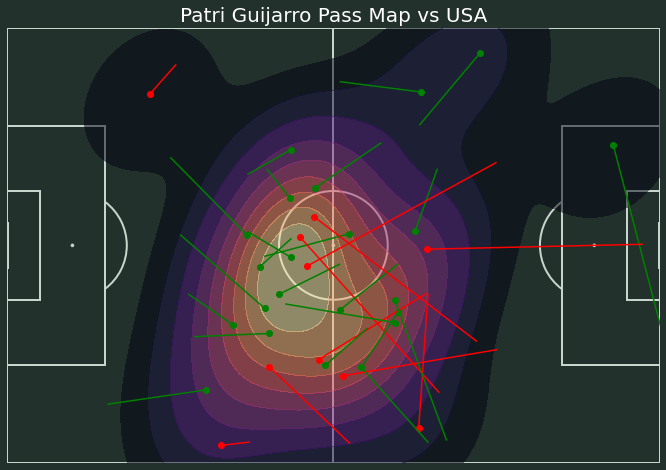

In [6]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(
        df['X'].astype(int),
        df['Y'].astype(int),
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)


#use a for loop to plot each pass
for z in range(len(df['X'])):
    if df['pass_outcome'].iloc[z] != 'Incomplete':
        plt.plot((df['X'].iloc[z],df['End_X'].iloc[z]),(df['Y'].iloc[z],df['End_Y'].iloc[z]),color='green')
        plt.scatter(df['X'].iloc[z],df['Y'].iloc[z],color='green')
    if df['pass_outcome'].iloc[z] == 'Incomplete':
        plt.plot((df['X'].iloc[z],df['End_X'].iloc[z]),(df['Y'].iloc[z],df['End_Y'].iloc[z]),color='red')
        plt.scatter(df['X'].iloc[z],df['Y'].iloc[z],color='red')
        
plt.xlim(0,120)
plt.ylim(0,80)

plt.title('Patri Guijarro Pass Map vs USA',color='white',size=20)